# Quantile-Quantile Plots

Quantile-quantile plots (QQ plots for short) are a graphical tool to assess whether a sample follows a certain distribution.

In [1]:
import functools

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from mltools.visualization import qqplot

In [2]:
# Set the NumPy random number generator seed for consistency
np.random.seed(100)

## Artificial normally distributed data

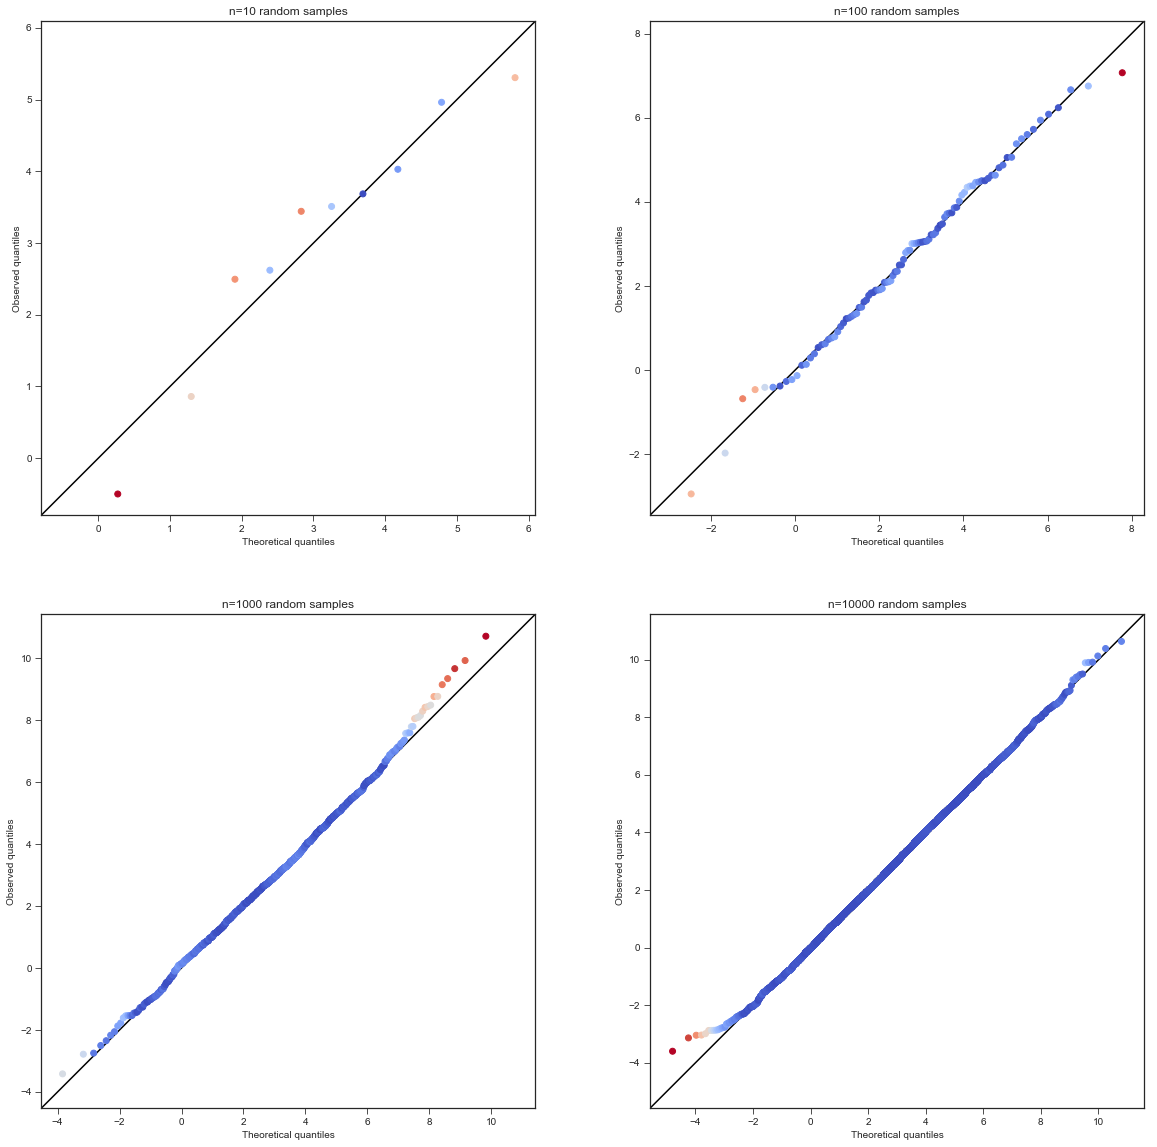

In [3]:
sns.set_style("ticks")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

for i, size in enumerate((10, 100, 1000, 10000)):
    ax = axes.flat[i]
    x = np.random.normal(loc=3, scale=2, size=size)
    qqplot(x, ax=ax)
    ax.set_title(f"n={size} random samples")
    
plt.show()
plt.close()

## Artificial exponentially distributed data

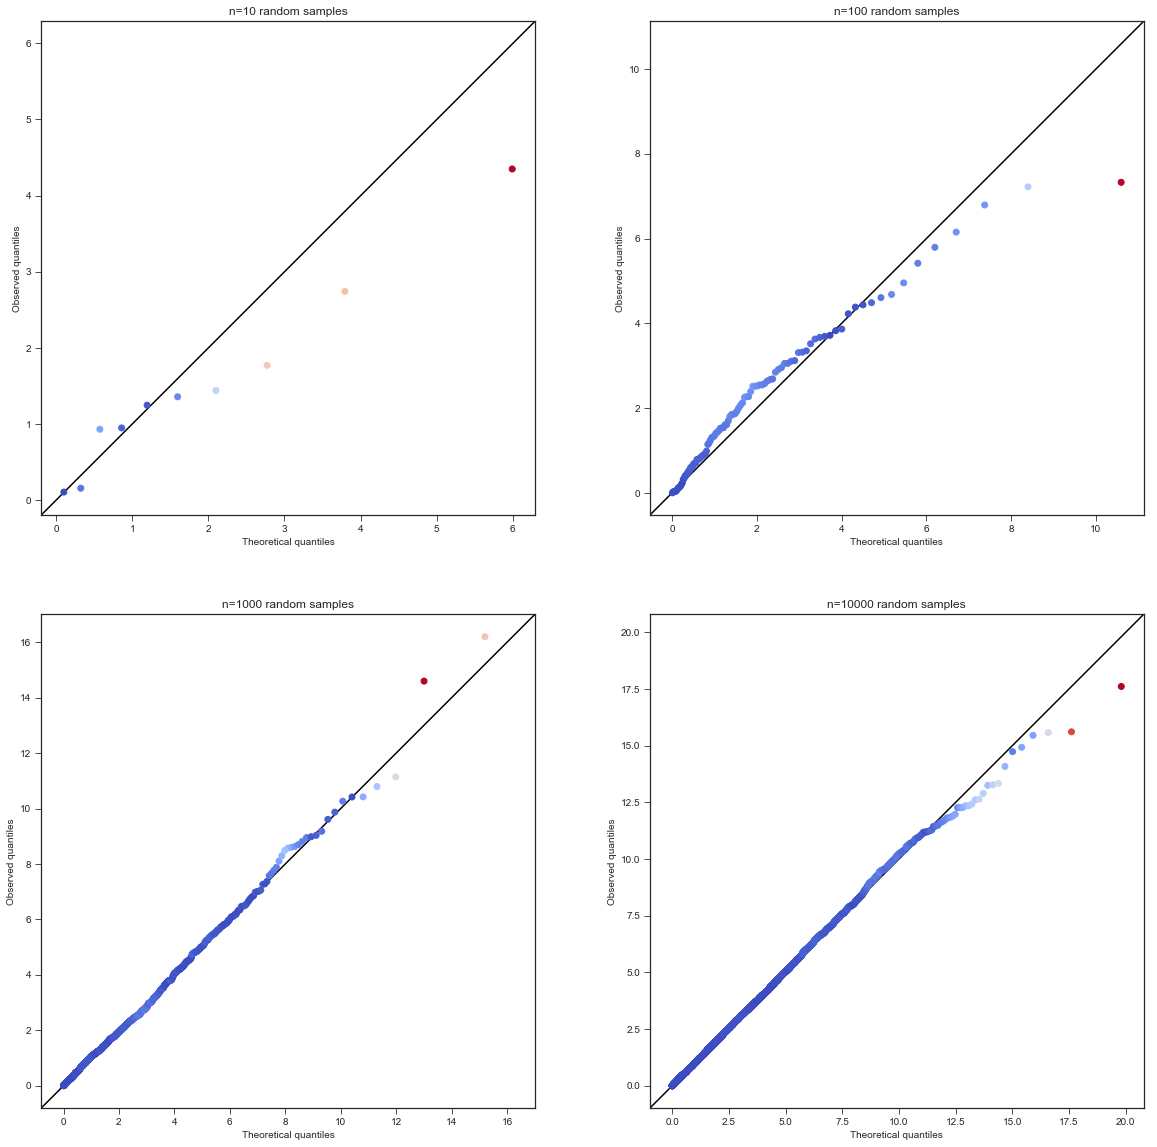

In [4]:
sns.set_style("ticks")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

for i, size in enumerate((10, 100, 1000, 10000)):
    ax = axes.flat[i]
    x = sp.stats.expon.rvs(scale=2, size=size)
    qqplot(x, qfunc=sp.stats.expon.ppf, qfunc_kwargs={"scale": 2}, ax=ax)
    ax.set_title(f"n={size} random samples")
    
plt.show()
plt.close()